## Machine Learning Project

* Pamela

* Rula

* Sarah

* Sirlene
### Questions to answer
* What is the probability  of develop hypertension if you are part of the group who consume alcohol, smoke and has high level of glucose? Work with classification and clustering to identify stage of develop hypertension ( eg: 30, 40, 50, and above 60 years old).

* How likely life style implyes in the developing heart disease?


###  Data Understanding and Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [2]:
#Reading the dataset
cardio = pd.read_csv('cardio.csv')
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
print("duplicate {}".format(cardio.duplicated().sum()))
print(cardio.isnull().sum())

duplicate 0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [4]:
# Summary of the dataset: 70000 rows, 13 columns, no null values
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Data Preparation

In [5]:
#Convert the age column from days to years
cardio["age"]= cardio["age"].div(365).round()

In [6]:
cardio = cardio.drop(columns=["id"])

In [7]:
#Show the 5 first rows
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


**Calculate the mean of height per gender, to discover which gender goes for number 1 and 2.**

We assume that men are higher than women on average.

By group by gender and find the mean we can conclude that:

* 1 goes for Women

* 2 goes for men


In [8]:
cardio.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [9]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Few points to look at:


Height of 55cm and 250cm isn’t normal at all.

Weight of 10kg already tell us there is outlier.

Systolic: A negative value of blood pressure is impossible.

Diastolic: A negative value of blood pressure is impossible.


### Calcualted BMI and add it as new column

Drop weight and height columns


In [10]:
cardio.drop(cardio[(cardio['height'] > cardio['height'].quantile(0.975)) | (cardio['height'] < cardio['height'].quantile(0.025))].index,inplace=True)
cardio.drop(cardio[(cardio['weight'] > cardio['weight'].quantile(0.975)) | (cardio['weight'] < cardio['weight'].quantile(0.025))].index,inplace=True)

In [11]:
# Here we can visualize that ap_hi min and max values does not make sense, as we can't have -150 mm Hg or max as 16020 mm Hg.
# Similar wrong values for ap_lo, both will be adjusted in the Feature engineering.
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000
mean,53.349450,1.347806,164.497855,73.543564,128.815442,95.953308,1.359049,1.222654,0.086353,0.052876,0.803683,0.498199
std,6.750712,0.476278,6.862322,11.720806,160.987785,186.287388,0.674782,0.568902,0.280886,0.223788,0.397214,0.500001
min,30.000000,1.000000,150.000000,52.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,180.000000,106.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


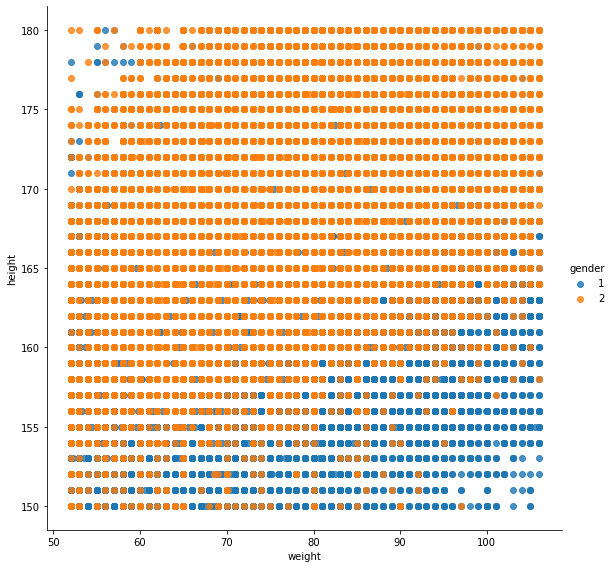

In [12]:
sns.lmplot(x="weight", y="height", hue="gender", data=cardio, fit_reg=False, height=8)
cardio["bmi"] = (cardio["weight"]/ (cardio["height"]/100)**2)
#cardio=cardio.drop(columns=["height","weight"])

In [13]:
#Shows the data with the addition of BMI column
cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54.0,1,172,70.0,130,90,1,1,0,0,1,1,23.661439
69994,58.0,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


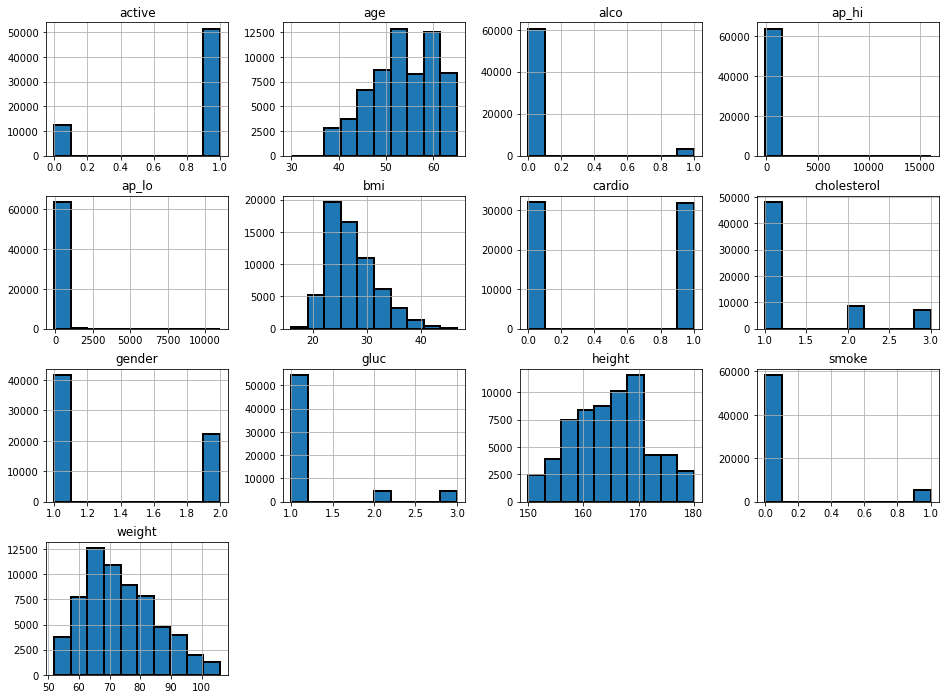

In [14]:
cardio.hist(edgecolor='black', linewidth=2, figsize=(16,12))
plt.show();

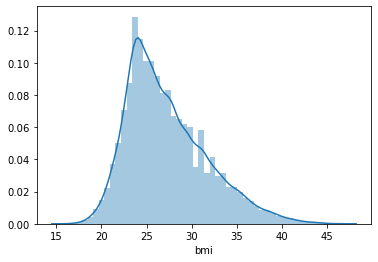

In [15]:
sns.distplot(cardio['bmi'])
plt.show()

## Feature Engineering

### Reading Blood pressure and Understanding Diastolic and Systolic pressure

#### Blood pressure range by the American Heart Association (AHA)
* Category 1 =  (ap_hi) systolic pressure < 120 and (ap_lo) diastolic pressure < 80 mm Hg.


* Category 2 =  (ap_hi) systolic pressure >= 120 & < 130 and (ap_lo) diastolic pressure < 80 mm Hg.


* Category 3 =  (ap_hi) systolic pressure >= 130 & < 140 and (ap_lo) diastolic pressure >= 80 & < 90 mm Hg.


* Category 4 =  (ap_hi) systolic pressure >= 140 & < 180 and (ap_lo) diastolic pressure >= 90 & < 120 mm Hg.


* Category 5 =  (ap_hi) systolic pressure >= 180 and (ap_lo) diastolic pressure >= 120 mm Hg.


Category 3 is High blood pressure and considered stage 1 hypertension.

Category 4 is more serious condition and considered stage 2 hypertension.

Category 5 is a serious health problem and requires urgent treatment.


Ref: https://www.healthline.com/health/high-blood-pressure-hypertension/blood-pressure-reading-explained



In [16]:
#Eliminate negative min values for  ap_hi and ap_lo and max values that does not make sense.
outlier_bp1 = ((cardio["ap_hi"] > 250) | (cardio["ap_lo"] > 160))
outlier_bp2 = ((cardio["ap_hi"] < 80) | (cardio["ap_lo"] < 30))
cardio = cardio[~outlier_bp1]
cardio = cardio[~outlier_bp2]

<ipython-input-16-696955be3cdc>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cardio = cardio[~outlier_bp2]


In [17]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000
mean,53.336440,1.347113,164.503999,73.489308,126.492624,81.309517,1.357197,1.222249,0.086249,0.052603,0.803495,0.493707,27.210516
std,6.751657,0.476056,6.854482,11.694924,16.375619,9.409223,0.673640,0.568602,0.280733,0.223242,0.397358,0.499964,4.434758
min,30.000000,1.000000,150.000000,52.000000,80.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.049383
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.291724
75%,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.760863
max,65.000000,2.000000,180.000000,106.000000,240.000000,160.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,46.666667


In [18]:
cardio.count()

age            62772
gender         62772
height         62772
weight         62772
ap_hi          62772
ap_lo          62772
cholesterol    62772
gluc           62772
smoke          62772
alco           62772
active         62772
cardio         62772
bmi            62772
dtype: int64

## Create a column adding Blood Pressure Category - bpc

In [19]:
cardio['bpc'] = 0

cardio.loc[(cardio['ap_hi'] < 120) & (cardio['ap_lo'] < 80), 'bpc'] = 1

cardio.loc[((cardio['ap_hi'] >= 120) & (cardio['ap_hi'] < 130)) &
         ((cardio['ap_lo'] < 80)), 'bpc'] = 2

cardio.loc[((cardio['ap_hi'] >= 130) & (cardio['ap_hi'] < 140)) |
         ((cardio['ap_lo'] >= 80) & (cardio['ap_lo'] < 90)), 'bpc'] = 3

cardio.loc[((cardio['ap_hi'] >= 140) & (cardio['ap_hi'] < 180)) |
         ((cardio['ap_lo'] >= 90) & (cardio['ap_lo'] < 120)), 'bpc'] = 4

cardio.loc[(cardio['ap_hi'] >= 180) | (cardio['ap_lo'] >= 120), 'bpc'] = 5

cols_ap_ = ['ap_hi', 'ap_lo']
cardio.drop(cols_ap_, axis= 1, inplace= True)

In [20]:
cardio

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,bmi,bpc
0,50.0,2,168,62.0,1,1,0,0,1,0,21.967120,3
1,55.0,1,156,85.0,3,1,0,0,1,1,34.927679,4
2,52.0,1,165,64.0,3,1,0,0,0,1,23.507805,3
3,48.0,2,169,82.0,1,1,0,0,1,1,28.710479,4
4,48.0,1,156,56.0,1,1,0,0,0,0,23.011177,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54.0,1,172,70.0,1,1,0,0,1,1,23.661439,4
69994,58.0,1,165,80.0,1,1,0,0,1,1,29.384757,4
69995,53.0,2,168,76.0,1,1,1,0,1,0,26.927438,3
69998,61.0,1,163,72.0,1,2,0,0,0,1,27.099251,3


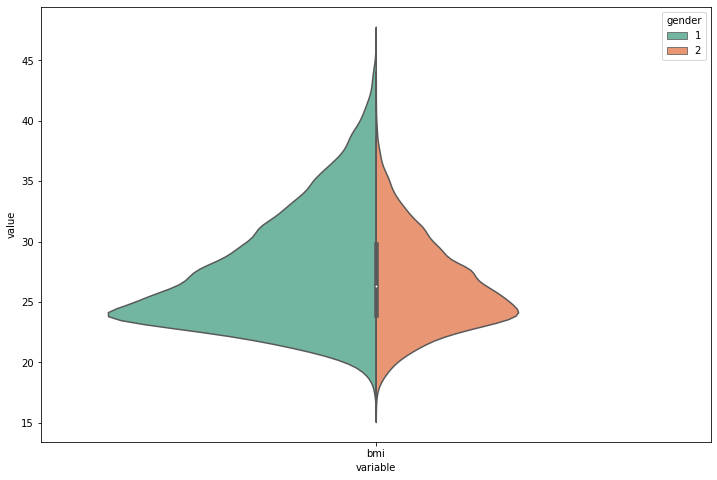

In [21]:
## Plot a violin to see the distribution of bmi across gender

import warnings
warnings.filterwarnings("ignore")
cardio_melt = pd.melt(frame=cardio, value_vars=['bmi'], id_vars=['gender'])
plt.figure(figsize=(12, 8))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=cardio_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

### Data Exploration

In [22]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62772 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          62772 non-null  float64
 1   gender       62772 non-null  int64  
 2   height       62772 non-null  int64  
 3   weight       62772 non-null  float64
 4   cholesterol  62772 non-null  int64  
 5   gluc         62772 non-null  int64  
 6   smoke        62772 non-null  int64  
 7   alco         62772 non-null  int64  
 8   active       62772 non-null  int64  
 9   cardio       62772 non-null  int64  
 10  bmi          62772 non-null  float64
 11  bpc          62772 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 6.2 MB


In [23]:
cardio_numeric = cardio.select_dtypes(include=['float64','int64'])
cardio_numeric.head()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,bmi,bpc
0,50.0,2,168,62.0,1,1,0,0,1,0,21.967120,3
1,55.0,1,156,85.0,3,1,0,0,1,1,34.927679,4
2,52.0,1,165,64.0,3,1,0,0,0,1,23.507805,3
3,48.0,2,169,82.0,1,1,0,0,1,1,28.710479,4
4,48.0,1,156,56.0,1,1,0,0,0,0,23.011177,1


<Figure size 1440x1008 with 0 Axes>

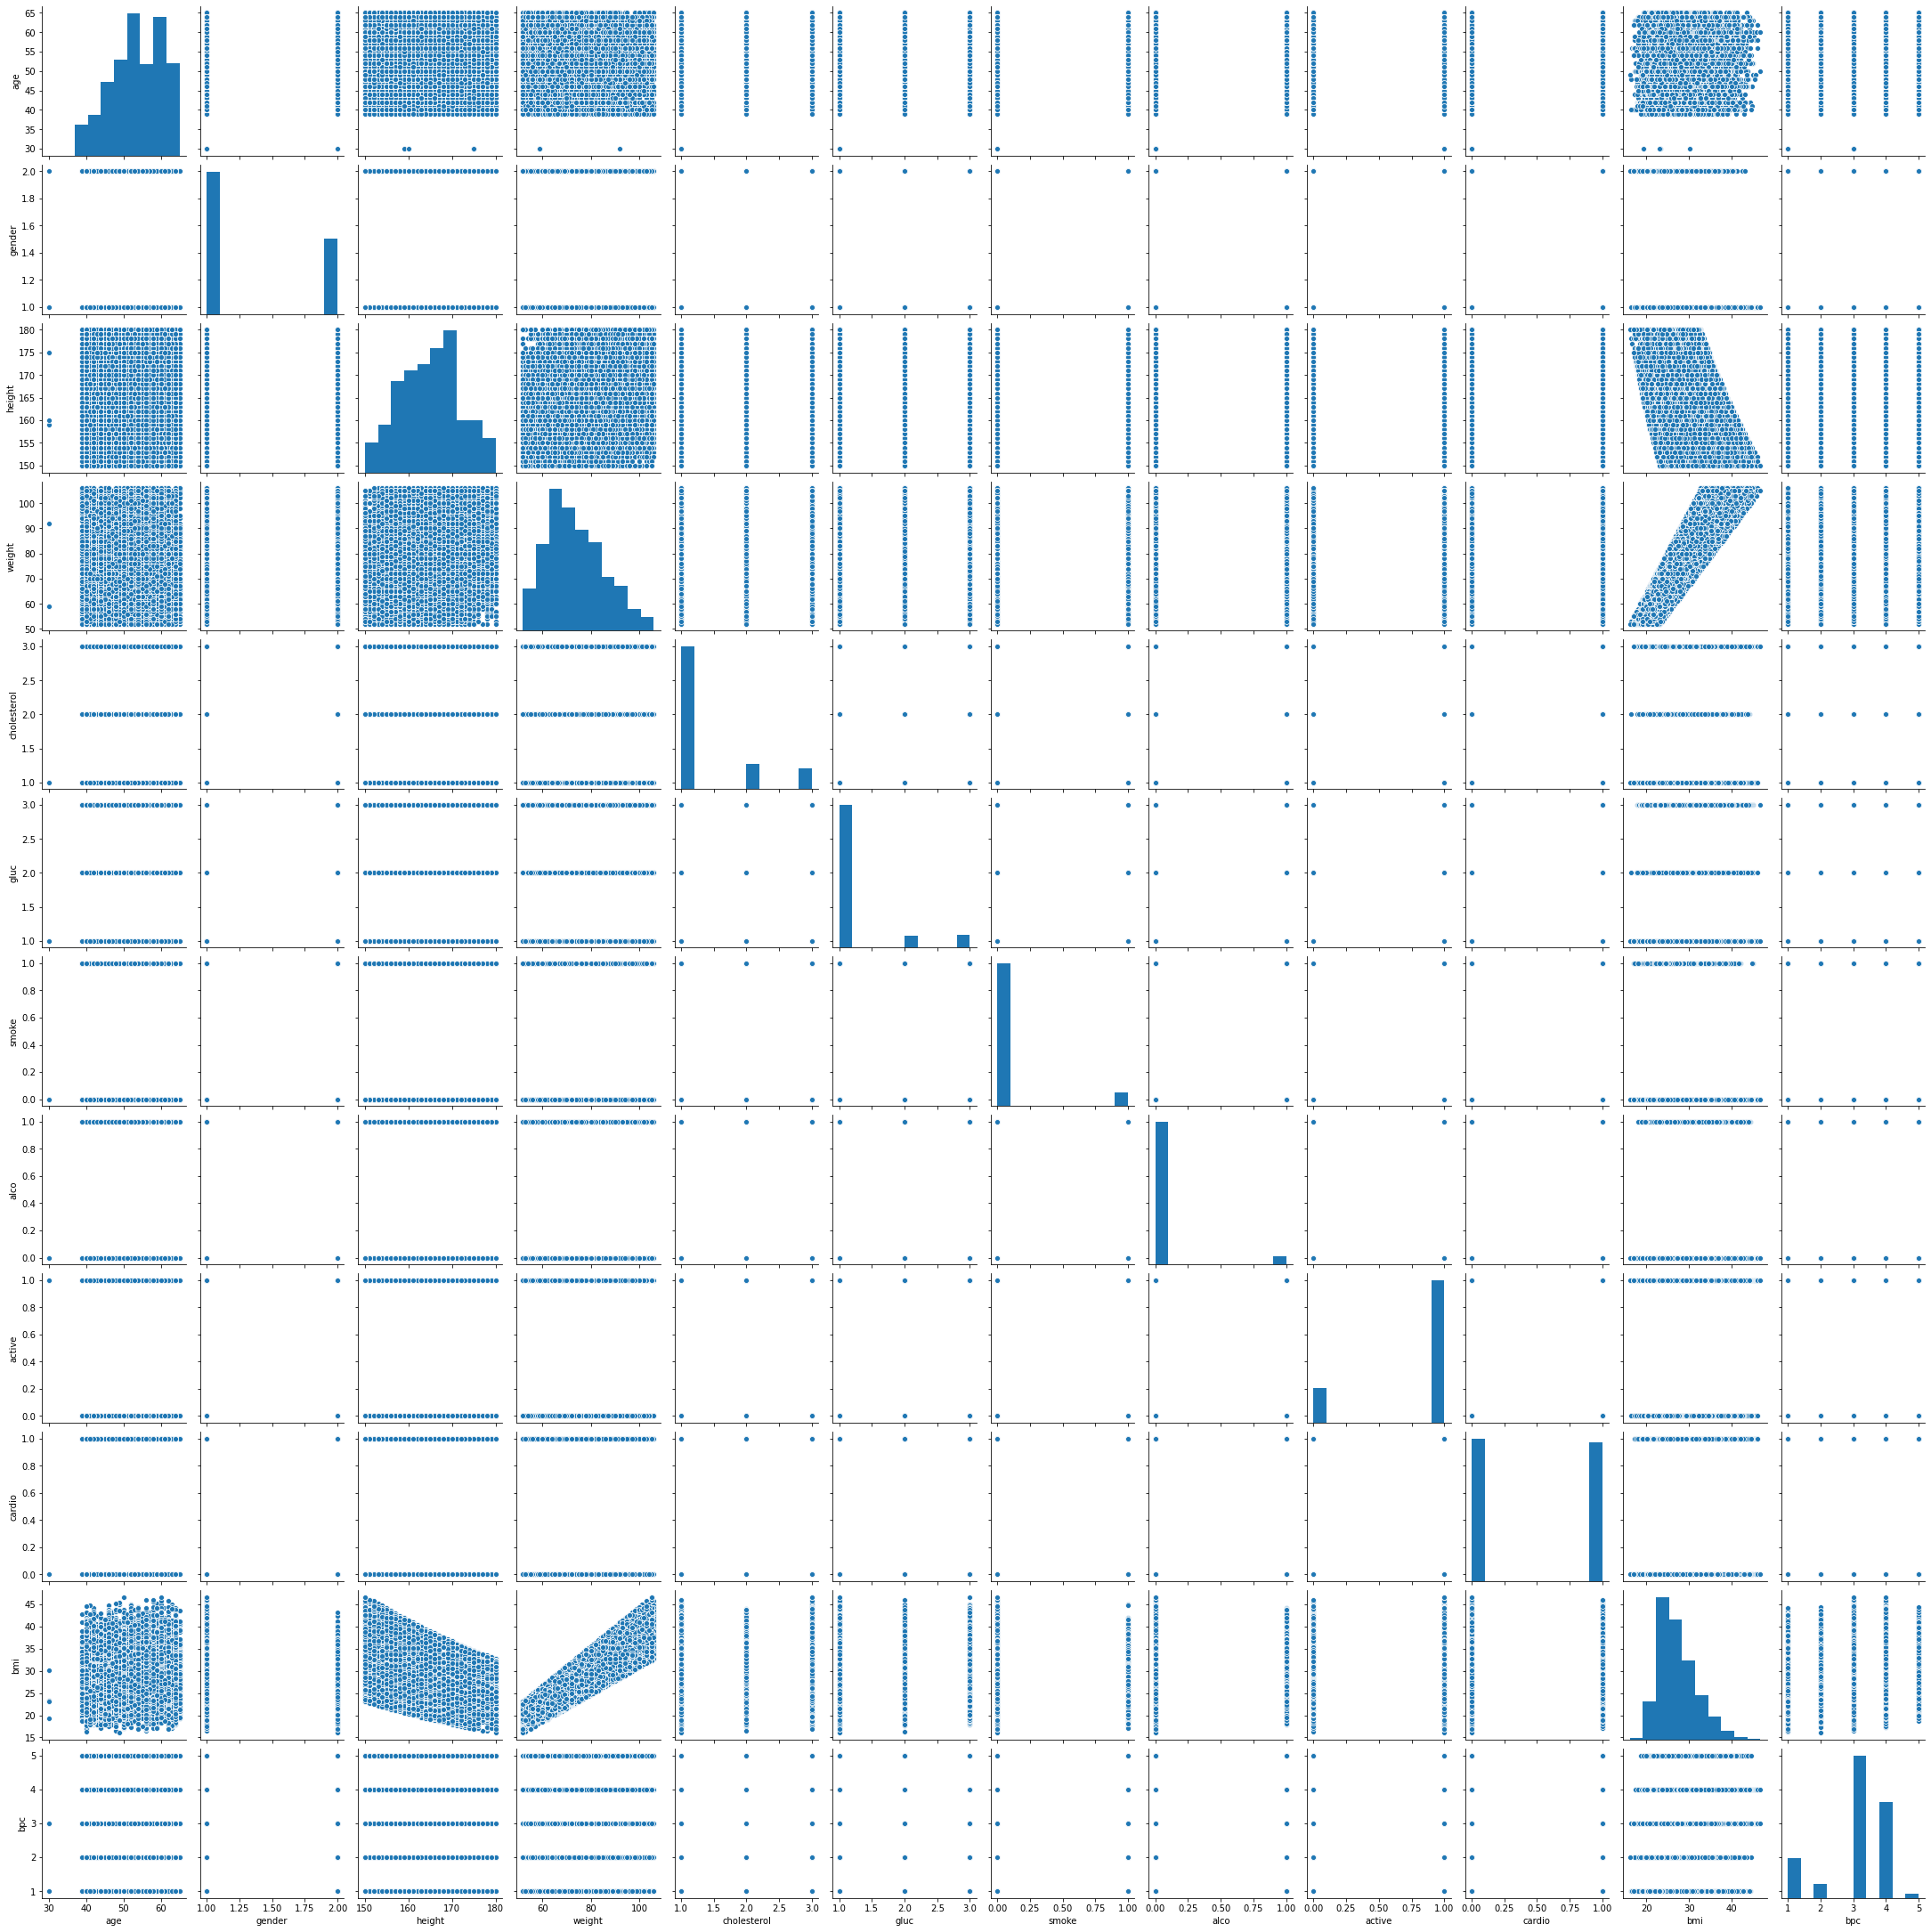

In [24]:
# paiwise scatter plot

plt.figure(figsize=(20, 14))
sns.pairplot(cardio_numeric)
plt.show()

In [25]:
for col in cardio_numeric.columns: 
    print(col)

age
gender
height
weight
cholesterol
gluc
smoke
alco
active
cardio
bmi
bpc


In [26]:
# correlation matrix
cor = cardio_numeric.corr()
cor

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,bmi,bpc
age,1.000000,-0.018694,-0.077512,0.069104,0.154200,0.097832,-0.044593,-0.027607,-0.011490,0.239708,0.109849,0.199966
gender,-0.018694,1.000000,0.505760,0.130530,-0.038548,-0.022634,0.338148,0.169814,0.007634,0.001982,-0.138812,0.068047
height,-0.077512,0.505760,1.000000,0.249049,-0.066977,-0.029194,0.187628,0.089626,-0.005218,-0.025788,-0.276508,0.029548
weight,0.069104,0.130530,0.249049,1.000000,0.134034,0.091479,0.055929,0.058841,-0.012123,0.166733,0.858610,0.231276
cholesterol,0.154200,-0.038548,-0.066977,0.134034,1.000000,0.452712,0.005824,0.030672,0.007917,0.218017,0.167745,0.161051
gluc,0.097832,-0.022634,-0.029194,0.091479,0.452712,1.000000,-0.010105,0.006167,-0.006668,0.087718,0.105787,0.074294
smoke,-0.044593,0.338148,0.187628,0.055929,0.005824,-0.010105,1.000000,0.341441,0.027402,-0.020423,-0.043441,0.020246
alco,-0.027607,0.169814,0.089626,0.058841,0.030672,0.006167,0.341441,1.000000,0.026554,-0.011022,0.010646,0.026403
active,-0.011490,0.007634,-0.005218,-0.012123,0.007917,-0.006668,0.027402,0.026554,1.000000,-0.036977,-0.009788,-0.002217
cardio,0.239708,0.001982,-0.025788,0.166733,0.218017,0.087718,-0.020423,-0.011022,-0.036977,1.000000,0.178155,0.369704


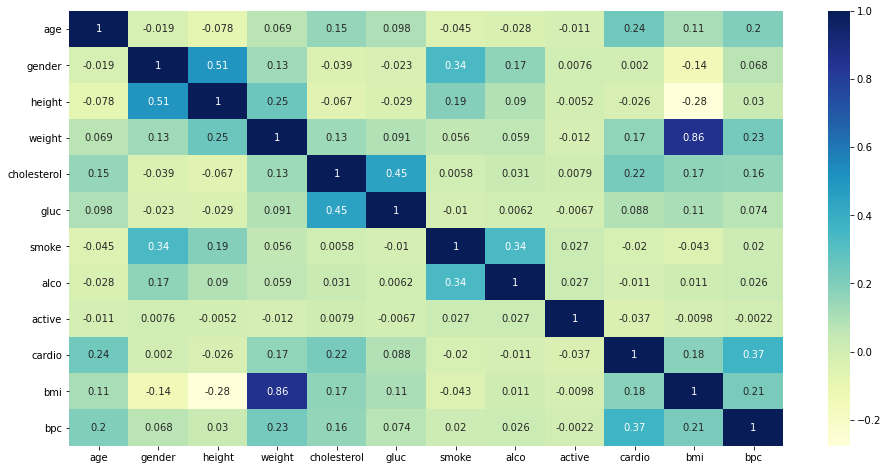

In [27]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Prepare the data to build a model

In [39]:
# split into X and y
X = cardio.loc[:, ['age', 'gender', 'weight', 'gluc', 'smoke', 'alco', 'bmi']]

y = cardio['cardio']

In [40]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['age', 'gender', 'weight', 'gluc', 'smoke', 'alco', 'bmi'], dtype='object')

#### First split 10% test and 90 % train

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=12345)

In [42]:
len(X_train)

56494

In [43]:
len(y_test)

6278

### Building Machine Learning Models

### Linear Regression 
Rula

### KNN Classifier 
Pamela

### Decision Trees
Sarah

### Classification/ Clustering
Sirlene